## Imports

In [1]:
%load_ext autoreload

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from utils import *
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_all = load_results()

/storagenfs/m.petix/hlt_usppm/src/analysis_plots/utils.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[:4]["epoch"] = -1


ahotrod/electra_large_discriminator_squad2_512
ahotrod/electra_large_discriminator_squad2_512
microsoft/deberta-v3-large
microsoft/deberta-v3-large


In [4]:
df_all.to_csv("df_all_finetuning.csv", index=None)

In [5]:
df_all.encoder_lr.value_counts()

0.000020    3369
0.000001      73
0.000100      36
Name: encoder_lr, dtype: int64

# Learning curves of all configurations

<ipython-input-6-7a6a6a53ee21>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots()


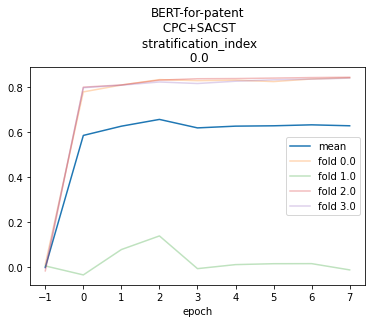

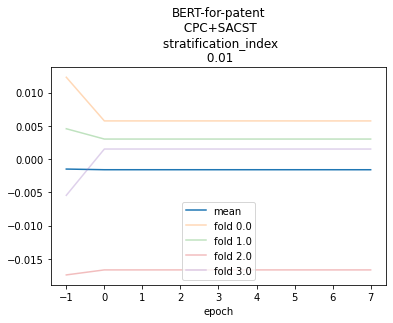

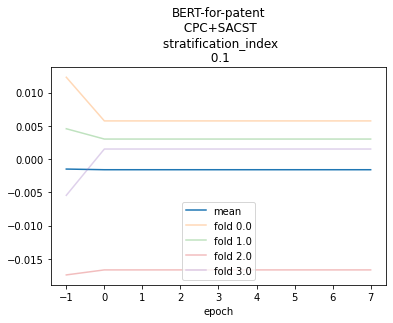

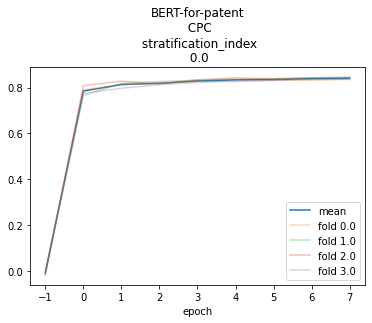

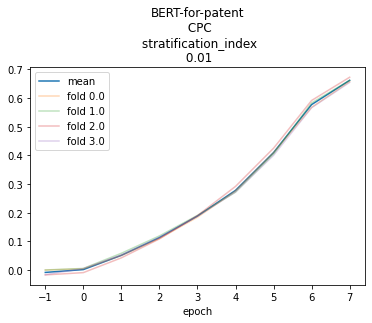

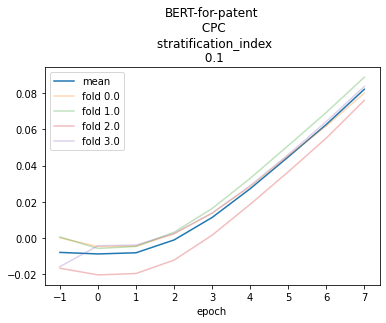

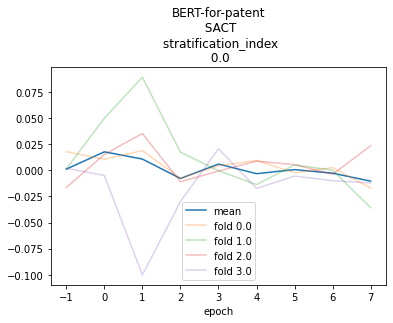

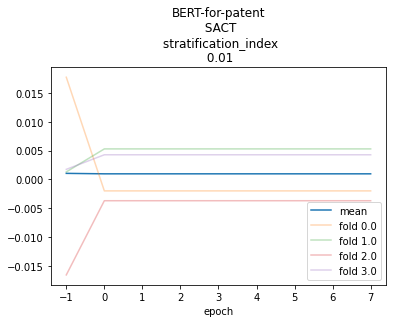

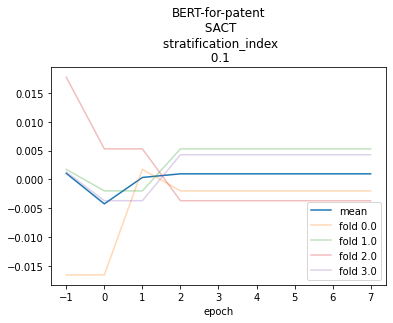

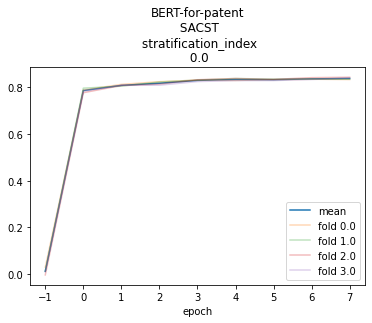

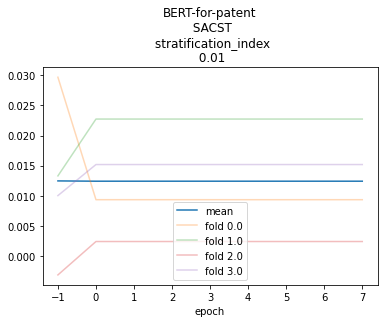

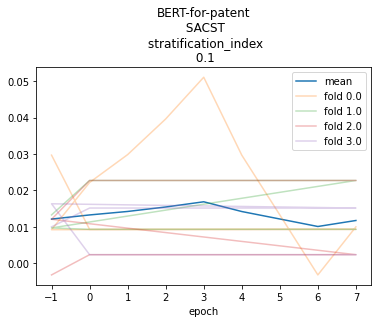

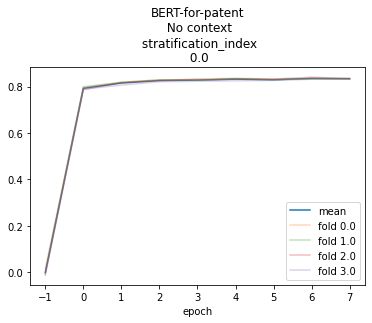

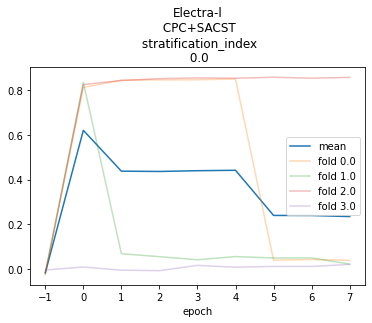

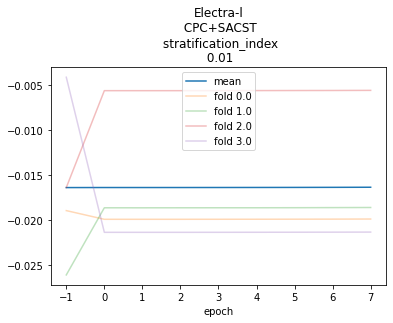

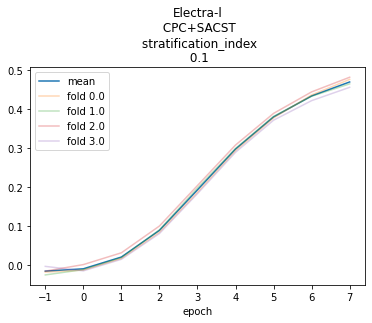

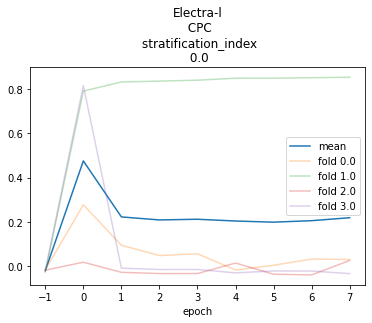

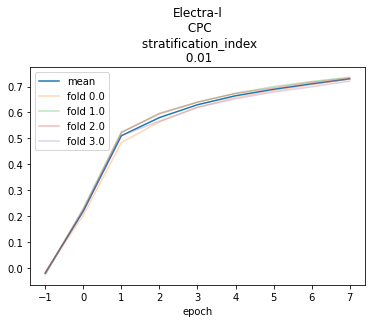

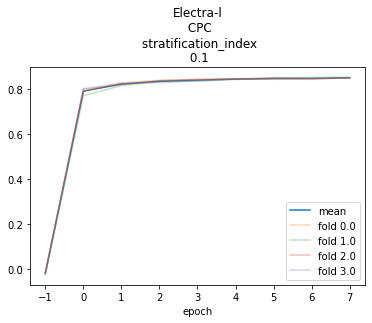

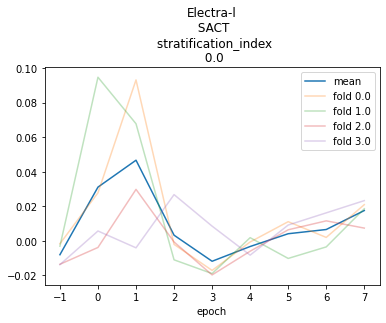

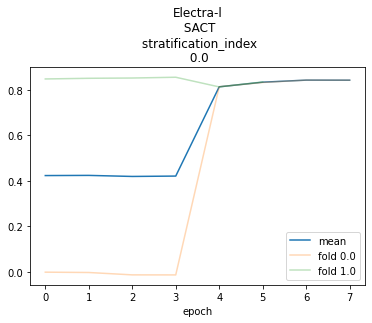

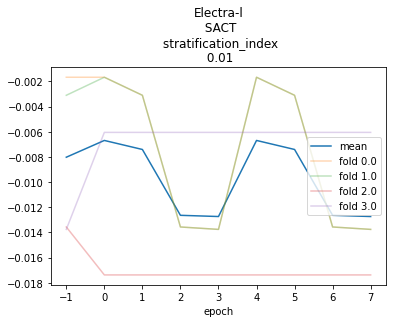

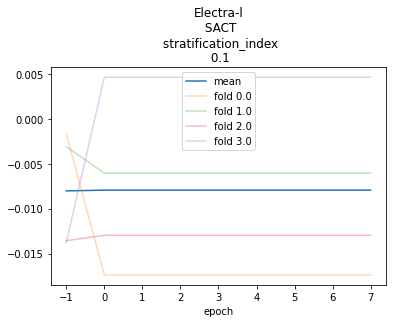

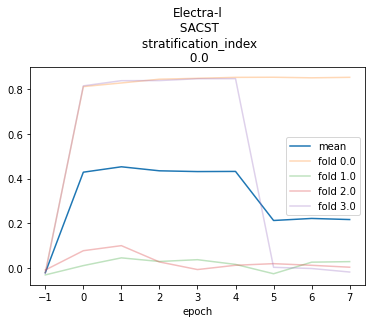

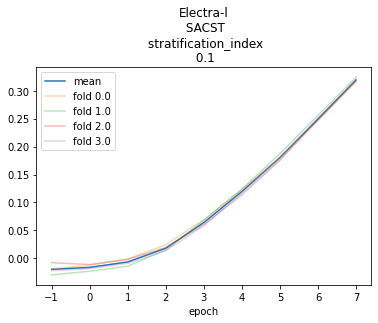

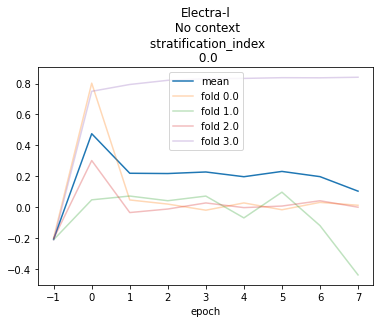

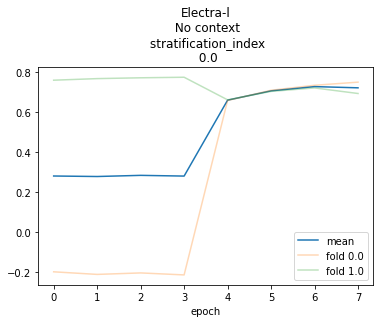

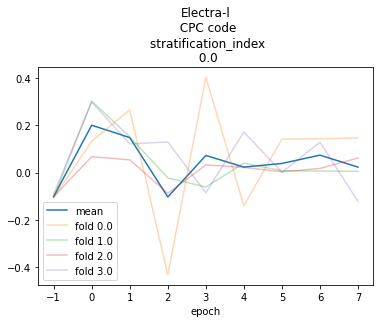

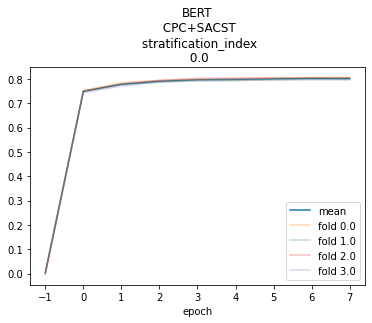

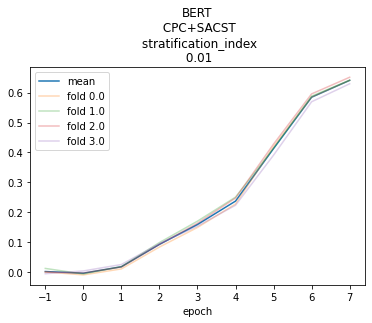

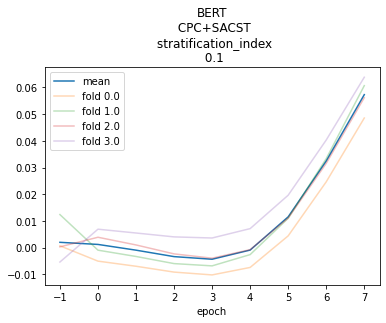

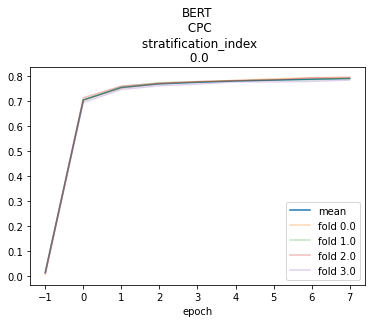

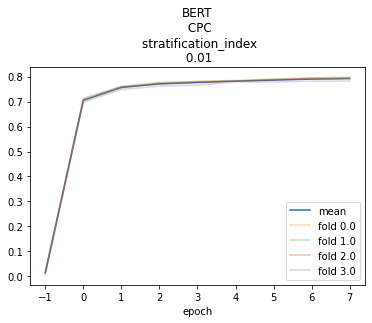

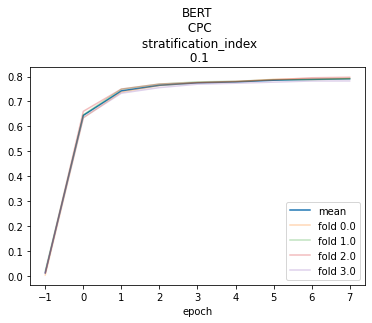

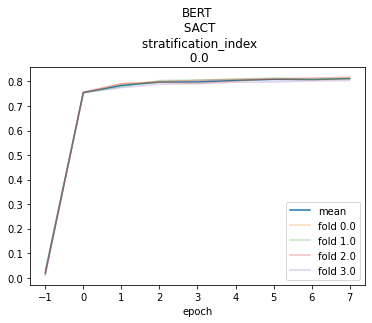

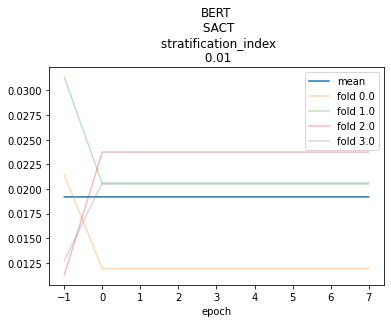

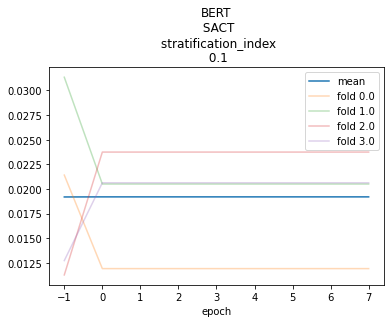

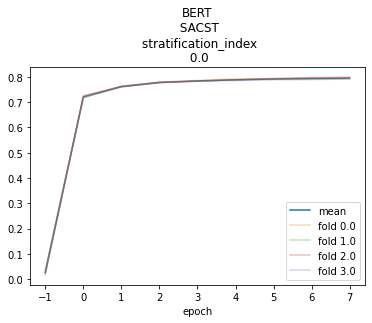

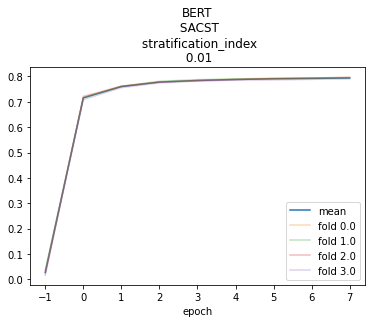

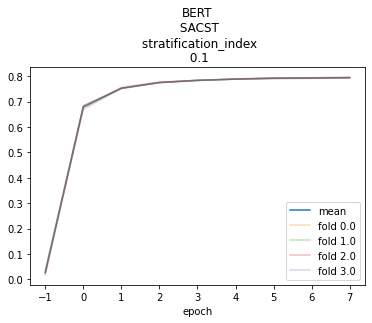

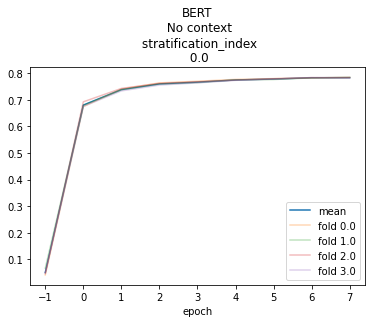

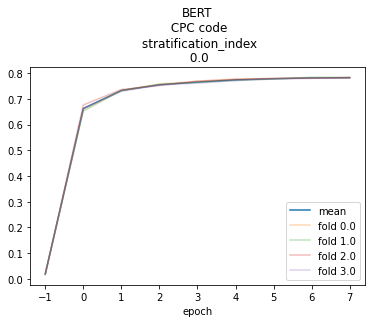

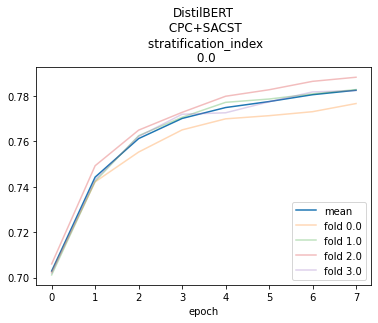

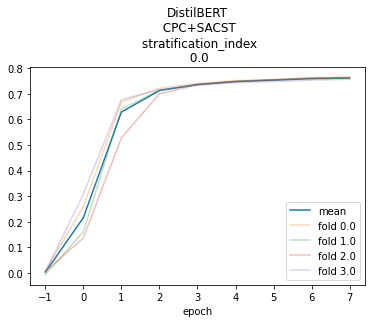

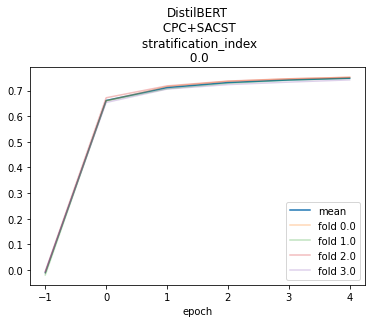

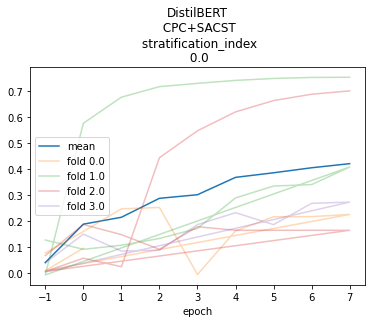

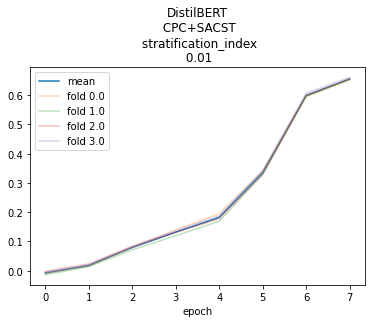

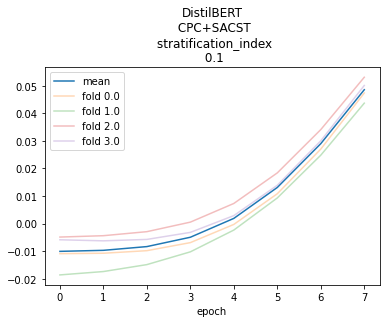

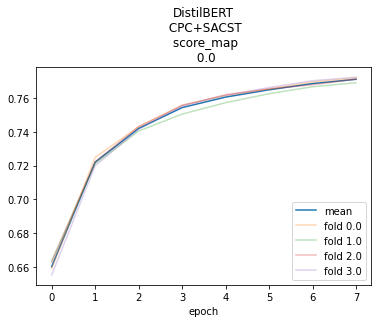

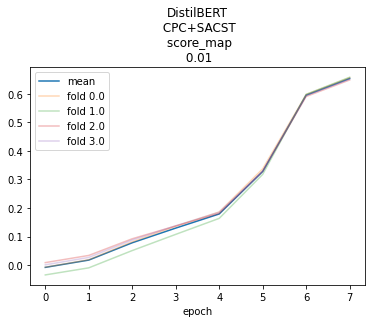

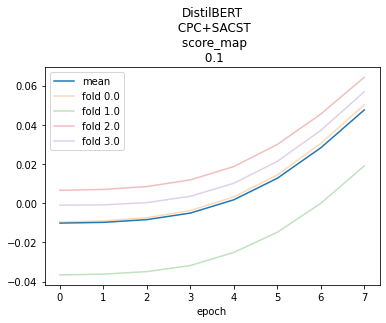

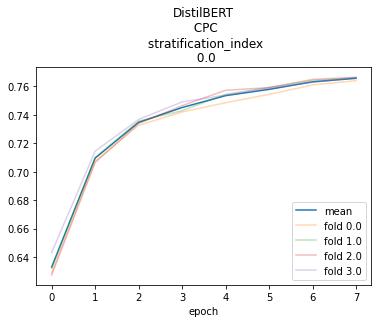

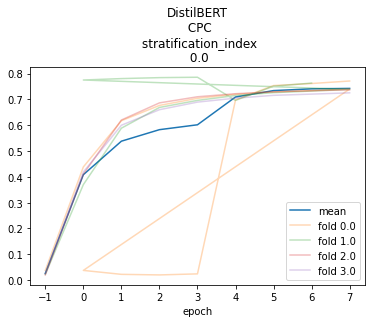

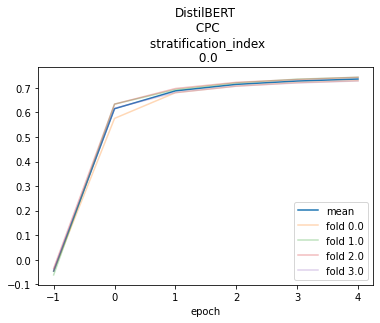

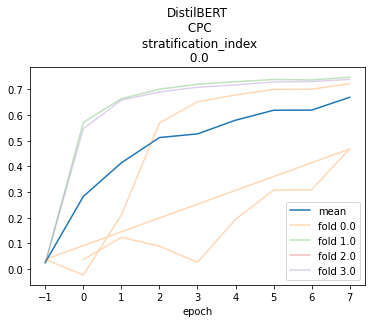

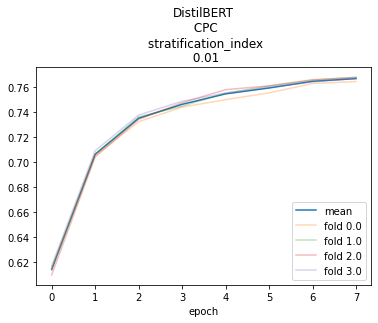

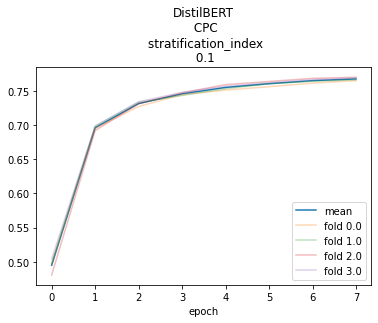

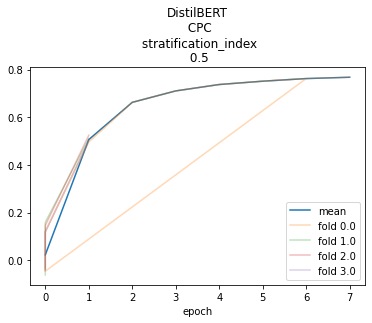

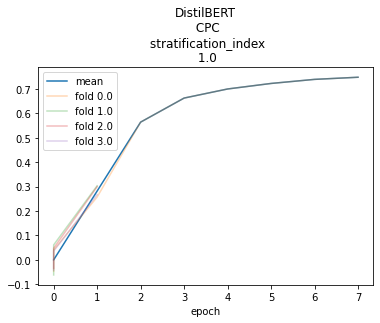

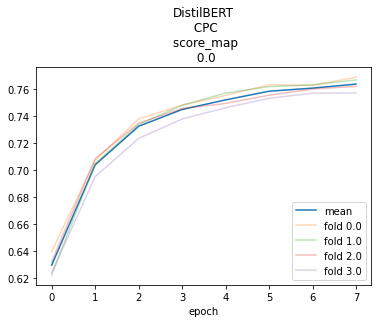

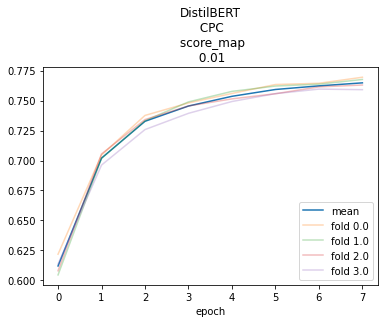

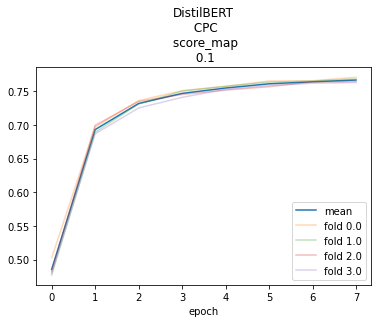

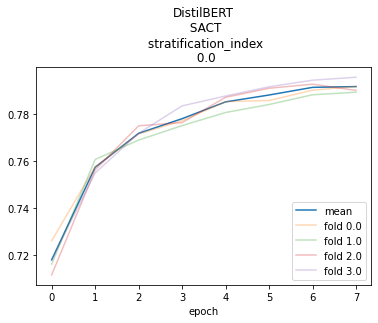

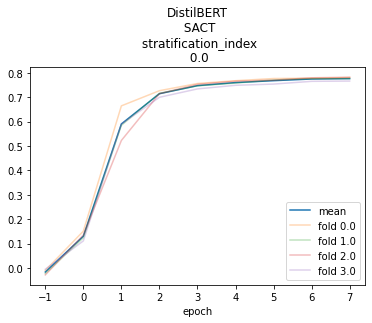

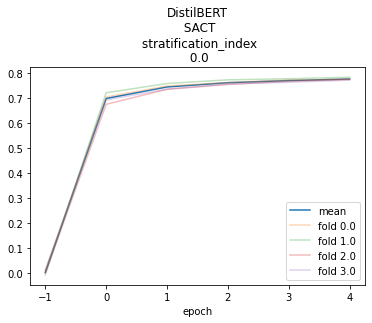

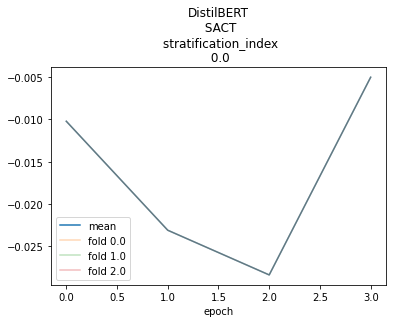

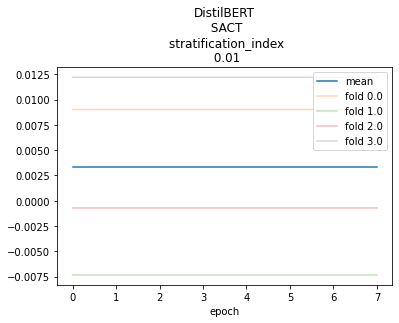

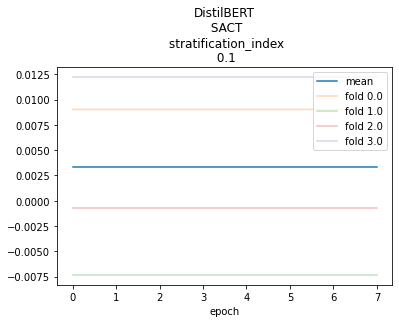

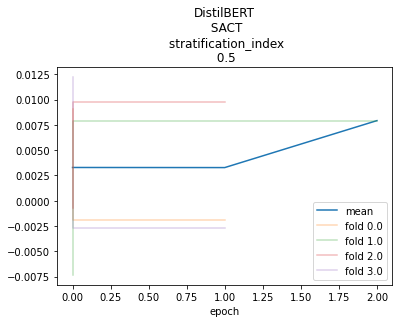

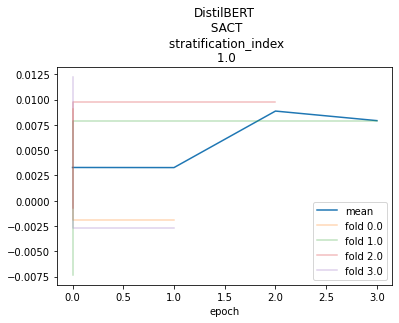

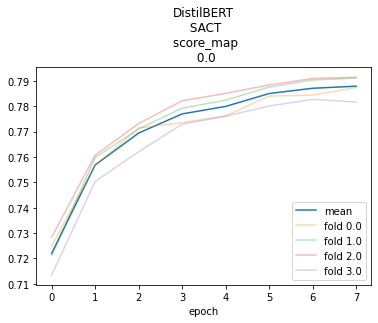

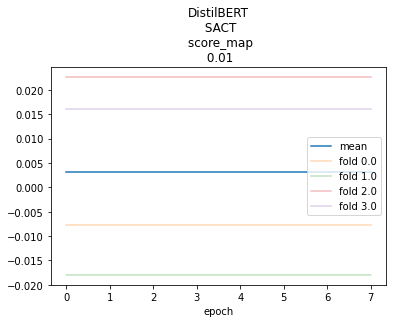

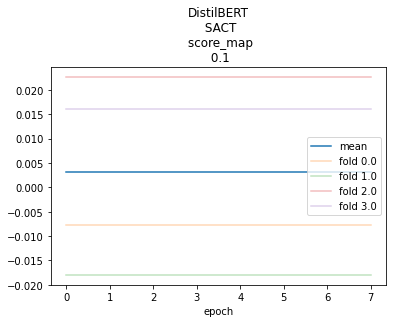

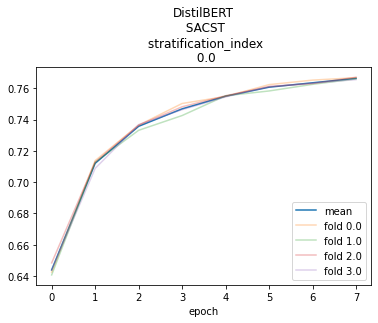

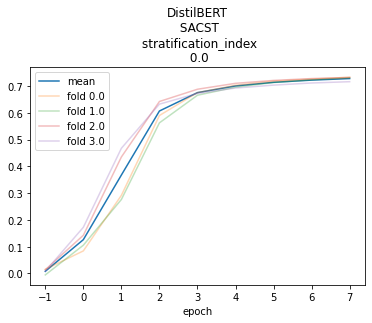

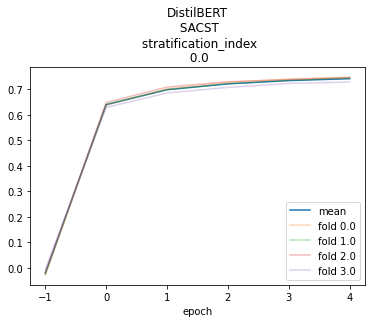

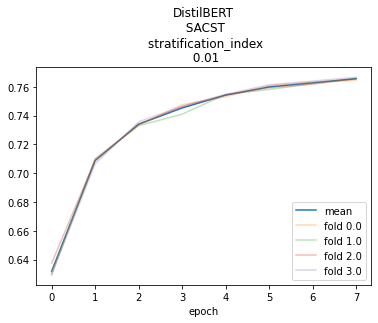

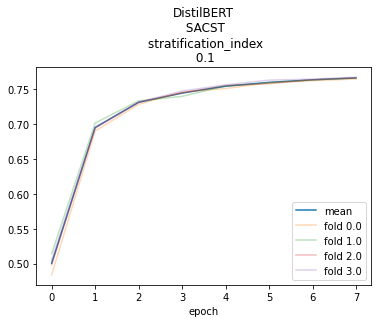

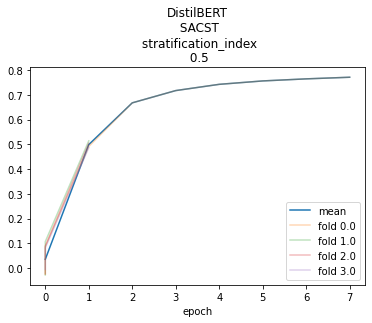

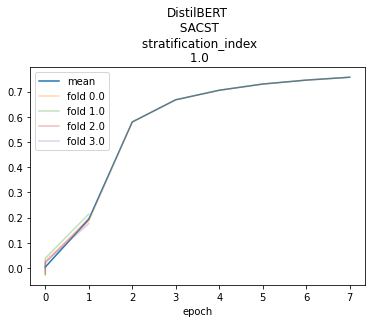

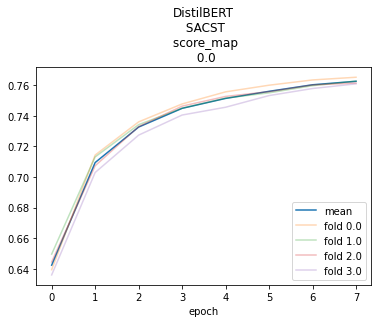

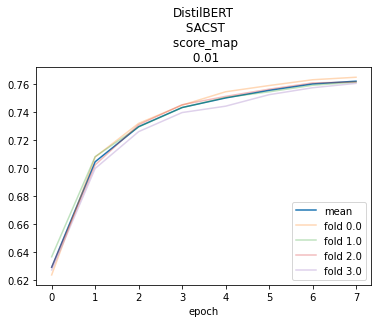

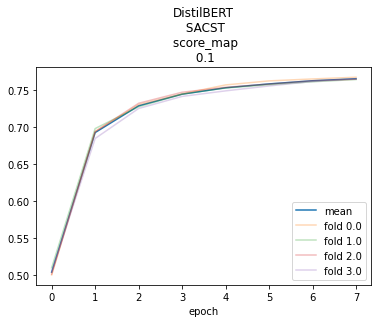

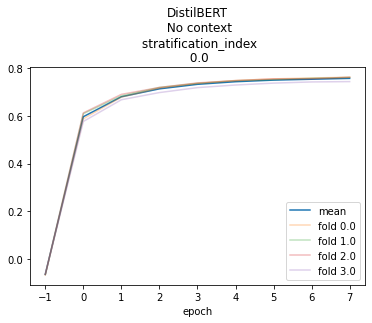

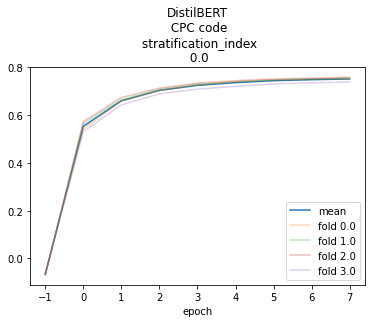

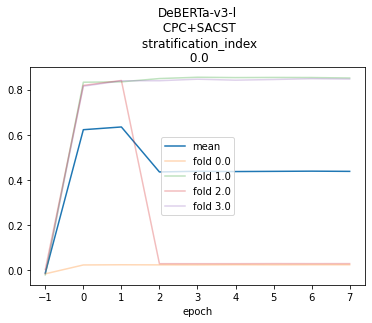

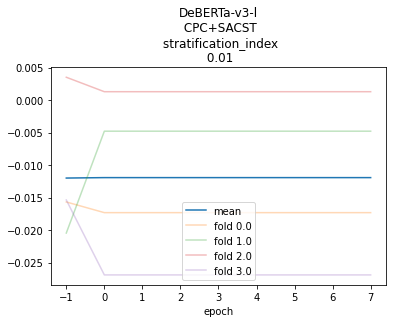

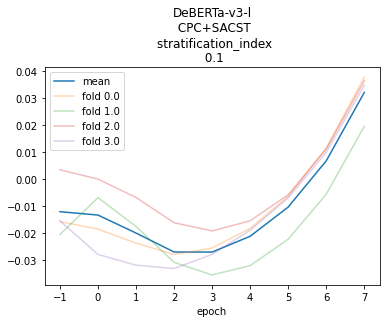

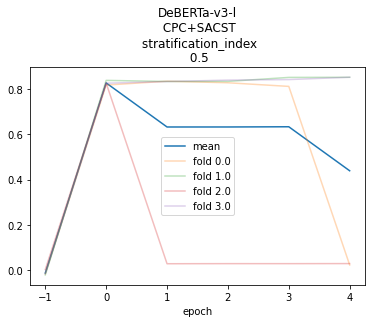

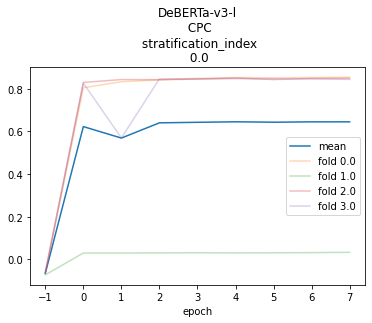

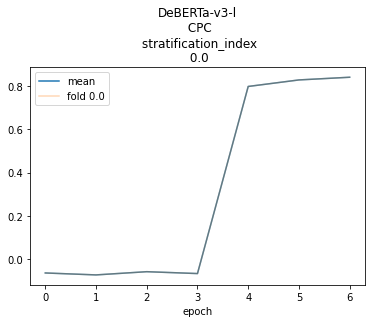

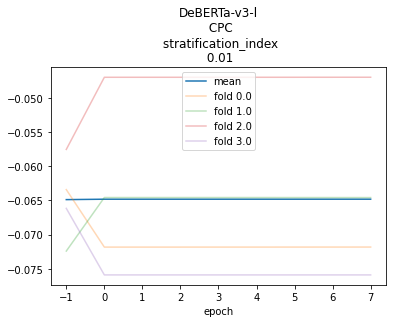

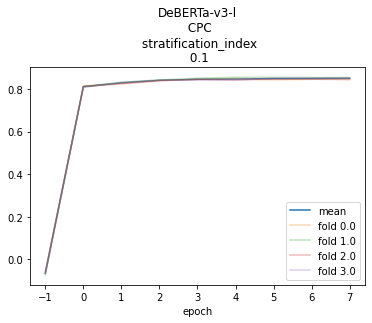

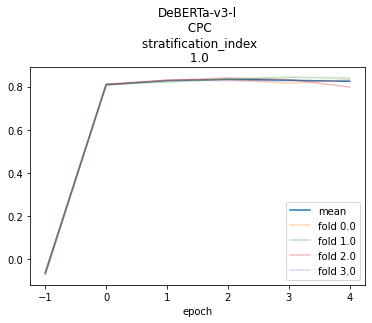

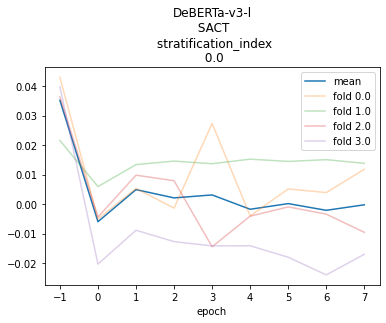

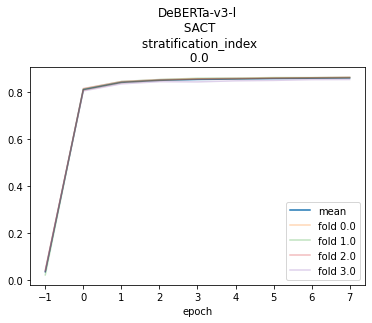

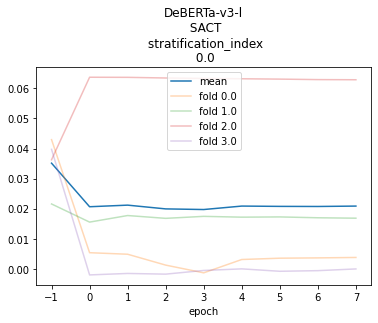

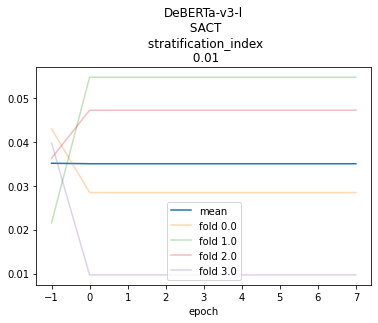

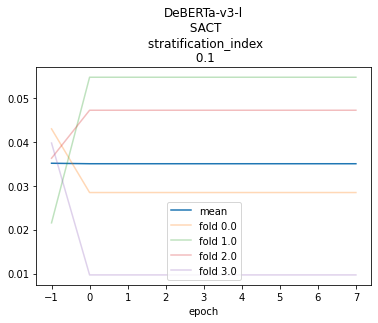

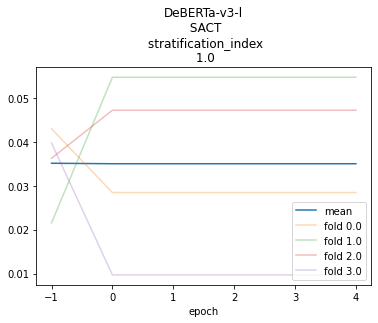

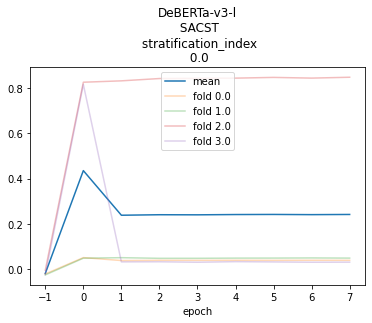

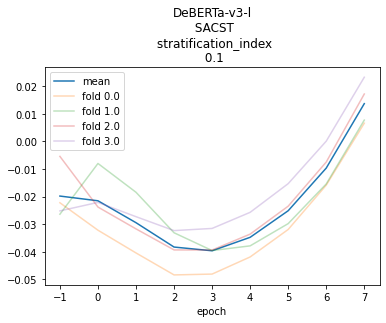

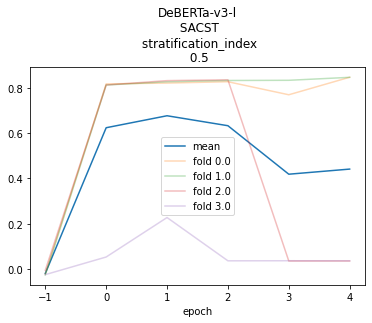

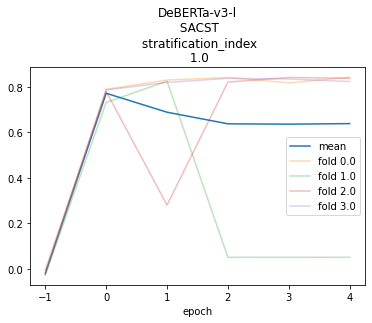

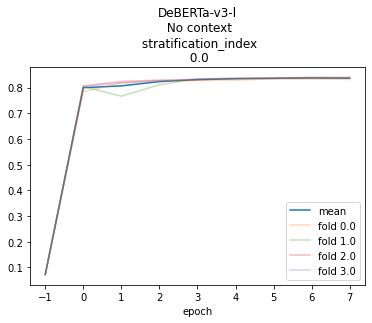

In [6]:
for model in df_all.model.unique():
    for f in df_all.features.unique():
        for s in df_all.stratify_on.unique():
            for w in df_all.warmup_steps.unique():
                for lr in df_all.encoder_lr.unique():
                    for loss in df_all.loss.unique():
                        for readout in df_all.readout.unique():
                            mini_df = df_all[(df_all.features == f) & (df_all.stratify_on == s) & \
                                            (df_all.model == model) & (df_all.warmup_steps == w) & (df_all.encoder_lr == lr) \
                                                & (df_all.loss == loss) & (df_all.readout == readout)]
                            
                            model_for_file = model.replace("/","-")
                            try:
                                os.mkdir(f'plots/{model_for_file}')
                            except FileExistsError:
                                pass

                            if len(mini_df) > 0:
                                figure, ax = plt.subplots()
                                mini_df.groupby("epoch").agg("mean").reset_index().plot.line("epoch","val_score", ax=ax)
                                labels = ["mean"]
                                for fold in mini_df.fold.unique():
                                    mini_df[mini_df.fold == fold].plot.line("epoch","val_score",ax=ax, alpha=0.3)
                                    labels.append(f"fold {fold}")
                                plt.title(f"{model_for_file}\n {f}\n {s}\n {w}")
                                plt.legend(labels=labels)
                                
                                plt.savefig(f"plots/{model_for_file}/learning_curve_{f}_{s}_{w}_{lr}_{loss}.png")


## Comparing Stratification_strategy [DistilBERT, inter-fold/features max]

In [7]:
df_all[df_all.model == "DistilBERT"].groupby(['stratify_on', 'epoch']).agg(['max','mean','min']).reset_index()

stratify_on epoch index                val_score            \
                                 max       mean min       max      mean   
0              score_map   0.0    24  12.000000   0  0.728411  0.406078   
1              score_map   1.0    25  13.000000   1  0.760670  0.474837   
2              score_map   2.0    26  14.000000   2  0.773170  0.497907   
3              score_map   3.0    27  15.000000   3  0.782130  0.510943   
4              score_map   4.0    28  16.000000   4  0.785048  0.520156   
5              score_map   5.0    29  17.000000   5  0.788367  0.537070   
6              score_map   6.0    30  18.000000   6  0.790906  0.562896   
7              score_map   7.0    31  19.000000   7  0.791411  0.570895   
8   stratification_index  -1.0     3   1.500000   0  0.125999 -0.006209   
9   stratification_index   0.0    28  10.446541   0  0.775065  0.272221   
10  stratification_index   1.0    29  13.358779   1  0.780535  0.465468   
11  stratification_index   2.0    30  14.368421   2  0.784261  0.550169   
12  stratification_index   3.0    31  15.414414   3  0.785761  0.579178   
13  stratification_index   4.0    32  16.472727   4  0.787568  0.612111   
14  stratification_index   5.0    33  17.638298   5  0.791484  0.603721   
15  stratification_index   6.0    34  18.638298   6  0.794296  0.621467   
16  stratification_index   7.0    35  19.782609   7  0.795551  0.627382   

              val_loss            ... required_epochs total_time               \
         min       max      mean  ...             min        max         mean   
0  -0.036605  0.669705  0.622820  ...             1.0    22023.0  8626.500000   
1  -0.036220  0.669705  0.606440  ...             1.0    22023.0  8626.500000   
2  -0.034917  0.669705  0.601174  ...             1.0    22023.0  8626.500000   
3  -0.031813  0.669705  0.598423  ...             1.0    22023.0  8626.500000   
4  -0.025095  0.669705  0.597588  ...             1.0    22023.0  8626.500000   
5  -0.017974  0.669705  0.596343  ...             1.0    22023.0  8626.500000   
6  -0.017974  0.669705  0.592866  ...             1.0    22023.0  8626.500000   
7  -0.017975  0.669705  0.590823  ...             1.0    22023.0  8626.500000   
8  -0.069197  6.782946  1.521665  ...             5.0    22796.0  5497.846154   
9  -0.061848  1.169078  0.623924  ...             1.0    22796.0  5770.150943   
10 -0.023106       inf       inf  ...             1.0    22796.0  6305.847328   
11 -0.028395  1.162823  0.559707  ...             1.0    22796.0  6737.026316   
12 -0.010241  1.163822  0.551148  ...             1.0    22796.0  6687.207207   
13 -0.007338  0.839792  0.531803  ...             1.0    22796.0  6673.854545   
14 -0.007338  0.866942  0.578307  ...             1.0    22796.0  6847.957447   
15 -0.007338  0.869937  0.574533  ...             1.0    22796.0  6847.957447   
16 -0.007338  0.870158  0.570912  ...             1.0    22796.0  6971.641304   

           mean_epoch_time                        train_loss            \
       min             max        mean        min        max      mean   
0   3035.0      710.419354  278.274193  97.903225   0.673104  0.619125   
1   3035.0      710.419354  278.274193  97.903225   0.667685  0.591845   
2   3035.0      710.419354  278.274193  97.903225   0.667969  0.572073   
3   3035.0      710.419354  278.274193  97.903225   0.668481  0.564685   
4   3035.0      710.419354  278.274193  97.903225   0.667462  0.561166   
5   3035.0      710.419354  278.274193  97.903225   0.674332  0.556352   
6   3035.0      710.419354  278.274193  97.903225   0.678560  0.551271   
7   3035.0      710.419354  278.274193  97.903225   0.668017  0.550253   
8    446.0      651.314285  183.000860  12.742857        NaN       NaN   
9     86.0      707.774193  238.232299  12.285714   0.687798  0.624482   
10    86.0      707.774193  238.928625  12.285714   0.685523  0.595750   
11    86.0      707.774193  238.436465  12.285714   0.678615  0.576533   
12    86.0 

In [8]:
df_distilbert_strat = df_all[(df_all.model == "DistilBERT") & (df_all.warmup_steps==0) & (df_all.epoch!=-1)].groupby(['stratify_on', 'fold','features']).agg('max')
df_distilbert_strat = df_distilbert_strat.groupby(['stratify_on','features']).agg('mean').reset_index()
grouped = df_distilbert_strat.groupby(['features', 'stratify_on'])

# create new dataframe with desired columns
new_df = grouped['val_score'].aggregate(['first']).unstack()

# rename columns
new_df.columns = ["by score", "by score and CPC code"]
new_df[["by score", "by score and CPC code"]] = new_df[["by score", "by score and CPC code"]].apply(lambda x: x * 100)
new_df.loc['mean'] = new_df.mean(axis=0)
new_df.to_csv("statification_strategy.csv", float_format="%2.2f")

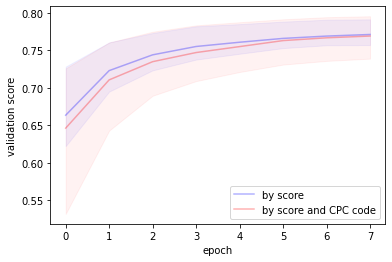

In [9]:
figure, ax = plt.subplots()
import matplotlib as mpl
df_distilbert_strat = df_all[(df_all.model == "DistilBERT") & (df_all.warmup_steps==0) & (df_all.epoch!=-1) & (df_all.readout=='attention')].groupby(['stratify_on', 'epoch']).agg(['max','min','mean']).reset_index()
labels = ["by score", "by score and CPC code"]
colors = ["blue","red"]
for i,strat in enumerate(df_distilbert_strat.stratify_on.unique()):
    proj = df_distilbert_strat[df_distilbert_strat.stratify_on == strat]
    proj.plot.line("epoch",("val_score","mean"),ax=ax, alpha=0.3, color=colors[i])
    ax.fill_between(proj.epoch, proj['val_score']['min'], proj['val_score']['max'], color=mpl.colors.to_rgba(colors[i], 0.05))
    
ax.legend(labels=labels, loc='lower right')
ax.set_ylabel("validation score")
plt.savefig(f"plots/DistilBERT/stratification_comparison.png")

## Comparing Warm-up Steps [intra-model analysis, inter-fold/features max]

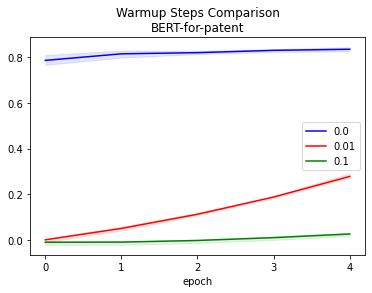

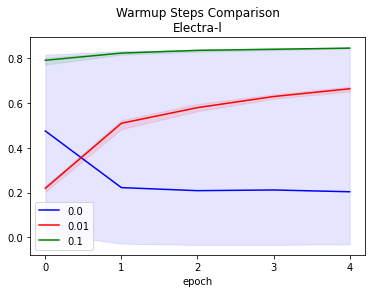

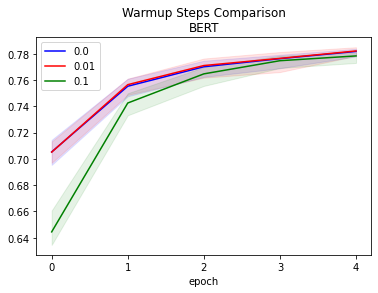

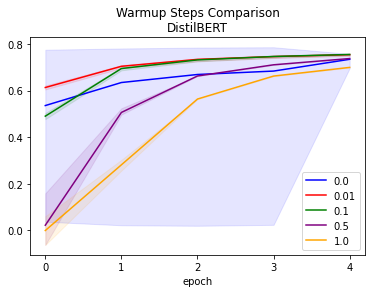

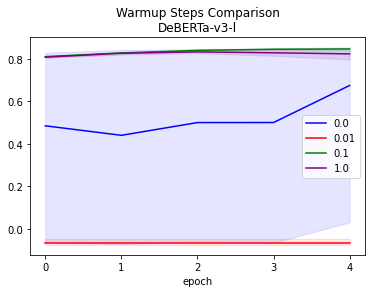

In [10]:
features_list = [
                "CPC",  
                #"same_anchor_context_targets",
                #'same_anchor_context_similar_targets',
                #"CPCdescription_same_anchor_context_similar_targets"
                ]

for model in df_all.model.unique(): #['DistilBERT','microsoft/deberta-v3-large','ahotrod/electra_large_discriminator_squad2_512']:
    model_for_file = model.replace("/","-")
    figure, ax = plt.subplots()
    
    df_small = df_all[(df_all.model == model) & (df_all.loss == 'bce') & (df_all.epoch.apply(type) != str) & (df_all.epoch < 5)
                      & (df_all.features.isin(features_list)) & (df_all.epoch!=-1)]\
                        [['model','features','warmup_steps','epoch','fold','val_score']] \
                .groupby(['model','epoch','warmup_steps']) \
                .agg(['max','mean','min']).reset_index()
    #df_small.epoch = df_small.epoch.apply(lambda x: 0 if type(x) == str else x)
    labels = []
    colors = ['orange','purple','green','red','blue']
    for steps in df_small.warmup_steps.unique():
        color = colors.pop()
        proj = df_small[df_small.warmup_steps == steps]
        proj.plot.line("epoch",("val_score","mean"), ax=ax, color=color)
        ax.fill_between(proj.epoch, proj.val_score["min"], proj.val_score["max"], color=color, alpha=0.1)
        labels.append(f"{steps}")
    plt.title(f"Warmup Steps Comparison\n{model_for_file}")
    plt.legend(labels=labels)

    # plots only integer xticks
    plt.xticks([0,1,2,3,4])
                
    plt.savefig(f'plots/{model_for_file}/warmup_comparison.png')

## Comparing Features [Fixed Stratification_strategy, inter-Folds mean ]

In [11]:
df_avg = df_all[(df_all.epoch != -1) & (df_all.val_score > 0) & (df_all.stratify_on == 'stratification_index') & (df_all.loss=='bce')]\
    .groupby(['model', 'features','warmup_steps','fold', 'encoder_lr']).agg('max')
df_avg = df_avg.groupby(['model','features','warmup_steps', 'encoder_lr']).agg('mean').reset_index()

In [12]:
# select the run having the highest average validation score
df_avg = df_avg.loc[df_avg.groupby(['model','features'])['val_score'].idxmax()]

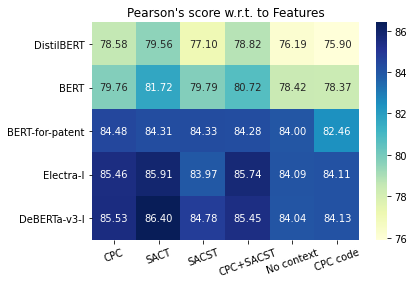

In [30]:
# Creazione del dataframe di esempio
score_matrix = np.zeros((len(df_all.model.unique()), len(df_all.features.unique())))

for i, model in enumerate(model_labels.values()):
    for j, feature in enumerate(feature_labels.values()):
        try:
            if model == "BERT-for-patent" and feature == "SACT":
                score_matrix[i][j] = 84.31
            elif model == "BERT-for-patent" and feature == "CPC+SACST":
                score_matrix[i][j] = 84.28
            elif model == "BERT-for-patent" and feature == "CPC code":
                score_matrix[i][j] = 82.46
            elif model == "Electra-l" and feature == "CPC+SACST":
                score_matrix[i][j] = 85.74
            elif model == "Electra-l" and feature == "SACST":    
                score_matrix[i][j] = 83.97
            elif model == "Electra-l" and feature == "SACT":    
                score_matrix[i][j] = 85.91
            elif model == "Electra-l" and feature == "No context":    
                score_matrix[i][j] = 84.09
            elif model == "Electra-l" and feature == "CPC code":    
                score_matrix[i][j] = 84.11
            elif model == "DeBERTa-v3-l" and feature == "CPC+SACST":    
                score_matrix[i][j] = 85.45
            elif model == "DeBERTa-v3-l" and feature == "CPC code":    
                score_matrix[i][j] = 84.13
            else:
                score_matrix[i][j] = df_avg[(df_avg.model == model) & (df_avg.features == feature)].val_score.values[0]*100
        except IndexError:
            score_matrix[i][j]= 0


# Creazione della heatmap
sns.heatmap(score_matrix, annot=True, cmap='YlGnBu', fmt='.2f')

plt.yticks(ticks=np.arange(len(model_labels.values()))+0.5, labels=model_labels.values() , rotation=0)
plt.xticks(ticks=np.arange(len(feature_labels.values()))+0.5, labels=feature_labels.values(), rotation=20)

# Aggiunta del titolo
plt.title('Pearson\'s score w.r.t. to Features')

# Mostra la heatmap
plt.savefig("plots/model_feature_heatmap.png",bbox_inches="tight" )

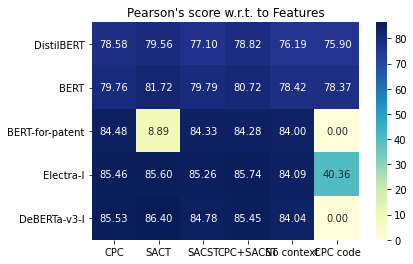

In [14]:
df_avg = df_all[(df_all.loss =='bce') & (df_all.stratify_on=='stratification_index')].groupby(['model', 'features','fold','warmup_steps']).agg('max') # takes the max score over the epochs
df_avg = df_avg.groupby(['model','features','warmup_steps']).agg('max').reset_index() # averages folds
df_avg = df_avg.groupby(['model','features']).agg('max').reset_index() # takes the best run

# Creazione del dataframe di esempio
score_matrix = np.zeros((len(df_all.model.unique()), len(df_all.features.unique())))

for i, model in enumerate(model_labels.values()):
    for j, feature in enumerate(feature_labels.values()):
        try:
            score_matrix[i][j] = df_avg[(df_avg.model == model) & (df_avg.features == feature)].val_score.values[0]*100
        except IndexError:
            score_matrix[i][j]= 0

# Creazione della heatmap
sns.heatmap(score_matrix, annot=True, cmap='YlGnBu', fmt='.2f')

plt.yticks(ticks=np.arange(len(model_labels.values()))+0.5, labels=model_labels.values() , rotation=0)
plt.xticks(ticks=np.arange(len(feature_labels.values()))+0.5, labels=feature_labels.values(), rotation=0)

# Aggiunta del titolo
plt.title('Pearson\'s score w.r.t. to Features')

# Mostra la heatmap
plt.savefig("plots/model_feature_heatmap.png")

# Comparing loss

In [15]:
df_small = df_all[(df_all.model == 'DistilBERT') & (df_all.warmup_steps == 0)].groupby(['loss','features','fold']).agg('max')

In [16]:
df_small = df_small.groupby(['loss','features']).agg('mean').reset_index()[['loss','features','val_score']]

In [17]:
grouped = df_small.groupby(['features', 'loss'])

# create new dataframe with desired columns
new_df = grouped['val_score'].aggregate(['first']).unstack()

# rename columns
new_df.columns = ['score with bce loss', 'score with pearson loss']
new_df[['score with bce loss', 'score with pearson loss']] = new_df[['score with bce loss', 'score with pearson loss']].apply(lambda x: x * 100)
#new_df = new_df.reset_index()

In [18]:
new_df.loc['mean'] = new_df.mean(axis=0)
new_df

,score with bce loss,score with pearson loss
features,,
CPC,77.238086,73.981391
CPC code,75.171420,NaN
CPC+SACST,78.243798,74.946049
No context,75.714729,NaN
SACST,76.626822,74.152523
SACT,79.271022,77.725522
mean,77.044313,75.201371


In [19]:
new_df.to_csv('loss_comparison.csv', float_format='%2.2f')

# Comparing architectures

In [20]:
df_all[(df_all.model=='DistilBERT') & (df_all.warmup_steps==0) & (df_all.loss=='bce')]\
.groupby(['features','fold','readout'])\
.agg('max')\
.reset_index()\
.groupby(['features','readout'])\
.agg(['mean','var','max']).reset_index()[['features','readout','val_score']]

features    readout val_score                        
                              mean           var       max
0         CPC  attention  0.766957  1.299453e-06  0.768635
1         CPC     linear  0.754792  8.057745e-04  0.785761
2    CPC code  attention  0.751714  7.672238e-05  0.758974
3   CPC+SACST  attention  0.782438  2.235962e-05  0.788157
4   CPC+SACST     linear  0.761297  1.205997e-05  0.764392
5  No context  attention  0.757147  8.138579e-05  0.761903
6       SACST  attention  0.766268  4.794859e-07  0.766975
7       SACST     linear  0.727846  6.163089e-05  0.732779
8        SACT  attention  0.792710  3.979449e-06  0.795551
9        SACT     linear  0.776325  5.074627e-05  0.781928

In [21]:
df_distilbert_strat = df_all[(df_all.model == "DistilBERT") & (df_all.loss=='bce') & (df_all.warmup_steps==0) & (df_all.epoch!=-1)].groupby(['readout','fold','features']).agg('max')
df_distilbert_strat = df_distilbert_strat.groupby(['readout','features']).agg(['mean','var']).reset_index()[['readout','features','val_score','mean_epoch_time']]

df_distilbert_strat.columns = df_distilbert_strat.columns.to_flat_index()
df_distilbert_strat.columns = [' '.join(col).strip() for col in df_distilbert_strat.columns.values]
grouped = df_distilbert_strat.groupby(['features', 'readout'])

# create new dataframe with desired columns
new_df = grouped[['val_score mean','val_score var','mean_epoch_time mean']].aggregate(['first']).unstack()

new_df["val_score mean"] = new_df["val_score mean"].apply(lambda x: x * 100, axis=1)
# reposition the columns
new_df.columns = [' '.join(col).strip().replace('val_score ', "").replace('first ','') for col in new_df.columns.values]
new_df.loc['mean'] = new_df.mean(axis=0)
new_df.rename(columns={'mean_epoch_time mean attention': 'epoch time attention', 'mean_epoch_time mean linear':'epoch time linear'}, inplace=True)
new_df = new_df.reset_index()[["features","mean attention","mean linear","var attention","var linear","epoch time attention","epoch time linear"]]
# export csv with mean column in %2.2f format, and var column in scientific notation
new_df.to_csv('readout_comparison.csv', index=None)


new_df

,features,mean attention,mean linear,var attention,var linear,epoch time attention,epoch time linear
0,CPC,76.695708,75.479169,1.299453e-06,0.000806,102.838709,99.935714
1,CPC code,75.171420,NaN,7.672238e-05,NaN,61.285714,NaN
2,CPC+SACST,78.243798,76.129651,2.235962e-05,0.000012,170.129032,155.485714
3,No context,75.714729,NaN,8.138579e-05,NaN,57.057142,NaN
4,SACST,76.626822,72.784625,4.794859e-07,0.000062,138.612903,128.314285
5,SACT,79.271022,77.632451,3.979449e-06,0.000051,710.419354,651.314285
6,mean,76.953917,75.506474,3.103770e-05,0.000233,206.723809,258.762499


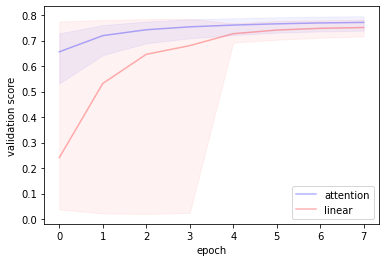

In [22]:
import matplotlib as mpl
figure, ax = plt.subplots()
df_distilbert_strat = df_all[(df_all.model == "DistilBERT") \
                             & (df_all.warmup_steps==0) \
                             & (df_all.epoch!=-1) \
                             & (df_all.features != 'No context')
                             & (df_all.loss=='bce')].groupby(['readout','epoch']).agg(['max','min','mean']).reset_index()
labels = ["attention", "linear"]
colors = ["blue","red"]
for i,strat in enumerate(df_distilbert_strat.readout.unique()):
    proj = df_distilbert_strat[df_distilbert_strat.readout == strat]
    proj.plot.line("epoch",("val_score","mean"),ax=ax, alpha=0.3, color=colors[i])
    ax.fill_between(proj.epoch, proj['val_score']['min'], proj['val_score']['max'], color=mpl.colors.to_rgba(colors[i], 0.05))
    
#ax.set_title(f"Stratification Strategy Comparison\nDistilBERT\naveraged over all features")
ax.legend(labels=labels, loc='lower right')
ax.set_ylabel("validation score")
plt.savefig(f"plots/DistilBERT/readout_comparison_all_features.png", bbox_inches="tight")

In [23]:
compute_model_size('gpt2')

124439808